*Special Note:*

Part 1 is the web scraping part (all commented out).

BERT models need to be run on a GPU; otherwise, it would take a significantly longer time to complete.

#1. Data collection and cleaning

General steps for Web Scraping
1. Check whether the website allows web scraping
2. Obtain the source code (HTML File) by using the website URL
3. Download the website content
4. Parse the content using keywords tags for elements of interest
5. Extract relevant data/features
6. Organize raw data in structured format (e.g., CSV)

In [ ]:
# #Install firefox
# !apt-get update
# !apt install firefox

# #Install selenium
# !pip install selenium

# #Updating and installing firefox libraries
# !apt-get update && apt-get install -y wget bzip2 libxtst6 libgtk-3-0 libx11-xcb-dev libdbus-glib-1-2 libxt6 libpci-dev && rm -rf /var/lib/apt/lists/*

# #Installing Geck Driver
# !wget https://github.com/mozilla/geckodriver/releases/download/v0.24.0/geckodriver-v0.24.0-linux64.tar.gz
# !tar -xvzf geckodriver*
# !chmod +x geckodriver
# !export PATH=$PATH:/path-to-extracted-file/.

# #Instal beautifulsoup
# !pip install beautifulsoup4

In [ ]:
# #import dependencies
# import selenium.webdriver as webdriver
# from selenium.webdriver.firefox.service import Service
# from selenium.webdriver.firefox.options import Options as FirefoxOptions

# import pandas as pd
# from bs4 import BeautifulSoup
# from datetime import datetime
# from selenium import webdriver
# from selenium.webdriver.common.by import By

# import random
# import time

# import requests
# import os
# import argparse
# from tqdm import tqdm

In [ ]:
# #define position and location
# position = "data+scientist" # Enter a job position <--- change here
# locations = "united+states" # Enter a location (City, State or Zip or remote) <--- change here

# def get_url(position, location):
#     url_template = "https://www.indeed.com/jobs?q={}&l={}"
#     url = url_template.format(position, location)
#     return url

# url = get_url(position, locations)
# dataframe = pd.DataFrame(columns=["Title", "Company", "Location", "Rating", "Date", "Salary", "Description", "Links"]) # <--- may change to add more features
# print(url)

In [ ]:
# #set path to webdriver
# driver_path = '/content/geckodriver'
# firefox_driver_path = '/content/geckodriver'
# user_agent = 'Mozilla'
# firefox_options = FirefoxOptions()
# firefox_options.add_argument('--headless')
# driver = webdriver.Firefox(options=firefox_options)

In [ ]:
# #scrape job postings
# postings = 1500 # Number of postings to scrape <--- change here

# jn=0
# for i in range(0, postings, 10):
#     driver.get(url + "&start=" + str(i))
#     driver.implicitly_wait(3)

#     jobs = driver.find_elements(By.CLASS_NAME, 'job_seen_beacon')
#     #print(jobs)

#     for job in jobs:
#         #print(job)
#         result_html = job.get_attribute('innerHTML')
#         #print(result_html)
#         soup = BeautifulSoup(result_html, 'html.parser')
#         #print(soup , '\n')

#         jn += 1

#         liens = job.find_elements(By.TAG_NAME, "a")
#         #print(liens)
#         links = liens[0].get_attribute("href")
#         #print(links)

#         title = soup.select('.jobTitle')[0].get_text().strip()
#         # print(title)

#         #company = soup.find_all(attrs={'data-testid': 'company-name'})[0].get_text().strip()
#         #print(company)
#         try:
#             company = soup.find_all(attrs={'data-testid': 'company-name'})[0].get_text().strip()
#             #print(company)
#         except:
#             company = 'Nan'
#         # print(company)
#         #location = soup.select('.companyLocation')[0].get_text().strip() #origional
#         #location = soup.select('.company_location')[0].get_text().strip()
#         location = soup.find_all(attrs={'data-testid': 'text-location'})[0].get_text().strip()
#         # print(location)
#         try:
#             salary = soup.select('.salary-snippet-container')[0].get_text().strip()
#         except:
#             salary = 'NaN'
#         try:
#             rating = soup.select('.ratingNumber')[0].get_text().strip()
#         except:
#             rating = 'NaN'
#         try:
#             date = soup.select('.date')[0].get_text().strip()
#         except:
#             date = 'NaN'
#         try:
#             description = soup.select('.job-snippet')[0].get_text().strip()
#         except:
#             description = ''
#         # -------------------------------------------------------------------- #
#         # #add some features
#         # job_url = links
#         # res = requests.get(job_url).content
#         # soup = BeautifulSoup(res, "html.parser")
#         # title = soup.find('h1').text
#         # job_info_main = soup.find('div', {"class": lambda x: x and x.startswith('jobsearch')})
#         # job_info = job_info_main.find('div', {"class": lambda x: x and x.startswith('jobsearch-CompanyInfoWithoutHeaderImage')})
#         # try:
#         #     benefits = soup.select('.jobBenefitsContainer')[0].get_text().strip()
#         # except:
#         #     benefits = ''
#         # -------------------------------------------------------------------- #

#         dataframe = pd.concat([dataframe, pd.DataFrame([{'Title': title,
#                                           "Company": company,
#                                           'Location': location,
#                                           'Rating': rating,
#                                           'Date': date,
#                                           "Salary": salary,
#                                           "Description": description,
#                                           "Links": links}])], ignore_index=True) # <--- may change to add more features
#         print("Job number {0:4d} added - {1:s}".format(jn,title))

In [ ]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# dataframe.head()

In [ ]:
# dataframe_copy = dataframe.copy()

In [ ]:
# #save results
# date = datetime.today().strftime('%Y-%m-%d')
# dataframe_copy.to_csv(date + "_copy_" + position + "_" + locations + ".csv", index=False) # Convert the dataframe to a csv file

In [ ]:
# from selenium.common.exceptions import NoSuchElementException

In [ ]:
# from google.colab import files # load file to Google Colab
# uploaded = files.upload() # due to size limit in the "scraping full descriptions part", the original file was divided into 5 parts named "p#_data+scientist_united+states.csv"

In [ ]:
# import io
# df = pd.read_csv(io.BytesIO(uploaded['p3_data+scientist_united+states.csv']))

In [ ]:
# df['Links'].isnull().sum()

In [ ]:
# #scrape full job descriptions
# Links_list = df['Links'].tolist() # Links_list

# descriptions=[]
# for i in Links_list:
#     driver.get(i)
#     driver.implicitly_wait(random.randint(2,3))
#     try:
#       jd = driver.find_element(By.XPATH, '//div[@id="jobDescriptionText"]').text
#     except NoSuchElementException:
#       jd = ''
#     descriptions.append(jd)
#     time.sleep(random.randint(3,5))

# df['Descriptions'] = descriptions

In [ ]:
# #save results
# # date = datetime.today().strftime('%Y-%m-%d')
# df.to_csv("part_3"+ ".csv", index=False) # Convert the dataframe to a csv file

In [ ]:
# dataframe.head()

#2. Exploratory data analysis and feature engineering

In [ ]:
import re
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
url = 'https://raw.githubusercontent.com/BarryF710/datasets/main/mie1624_a3_data_scientist_united_states.csv' # the scraped file was uploaded to my github
data = pd.read_csv(url) # read the dataset

In [ ]:
data.head()

,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions
0,"Data Scientist, Core AI",Indeed,Remote,NaN,EmployerActive 3 days ago,"$122,000 - $178,000 a year",Participate in code review and process innovat...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Our Mission\nAs the world’s number 1 job site*...
1,Senior Machine Learning Engineer - Data Automa...,Bloomberg,"New York, NY 10261",NaN,EmployerActive 15 days ago,"$165,000 - $260,000 a year",Familiarity with SQL and NoSQL data modeling a...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"What we do:\nOn the Data Automation team, we d..."
2,Data Scientist,Boston Medical Center,"Boston, MA",NaN,PostedToday,NaN,Understand health system data sources and supp...,https://www.indeed.com/rc/clk?jk=205f1e6dec985...,This opening is for individuals who love worki...
3,Jr. Data Scientist,ClimateAI,Remote,NaN,PostedPosted 30+ days ago,NaN,Background in data analysis and machine learni...,https://www.indeed.com/rc/clk?jk=f420fd336c4b8...,Culture\nAt ClimateAi we are driven by a unite...
4,Data Scientist - Remote,Optum,"Remote in Plymouth, MN 55441",NaN,PostedPosted 2 days ago,"$67,800 - $133,100 a year",You will advise on process improvement by iden...,https://www.indeed.com/rc/clk?jk=152e6cd22235c...,Optum is a global organization that delivers c...


In [ ]:
def extract_numbers(s):
  pattern = r'\d{1,3}(?:,\d{3})*(?:\.\d+)?'
  return [float(match.replace(',', '')) for match in re.findall(pattern, s)] # extract numbers with the format of $xxx,xxx

def get_salary(s):
  if pd.notna(s):
    salary = extract_numbers(s) # a list may containing the upper bound and the lower bound of the salary
    salary = sum(salary) / len(salary) # take the average of the two salary numbers
    return salary
  else:
    return np.nan # if salary info is not presented, it's NaN

data['Salary_value'] = data['Salary'].apply(get_salary) # add a new column named 'Salary_value'

In [ ]:
data.head()

,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions,Salary_value
0,"Data Scientist, Core AI",Indeed,Remote,NaN,EmployerActive 3 days ago,"$122,000 - $178,000 a year",Participate in code review and process innovat...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Our Mission\nAs the world’s number 1 job site*...,150000.0
1,Senior Machine Learning Engineer - Data Automa...,Bloomberg,"New York, NY 10261",NaN,EmployerActive 15 days ago,"$165,000 - $260,000 a year",Familiarity with SQL and NoSQL data modeling a...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"What we do:\nOn the Data Automation team, we d...",212500.0
2,Data Scientist,Boston Medical Center,"Boston, MA",NaN,PostedToday,NaN,Understand health system data sources and supp...,https://www.indeed.com/rc/clk?jk=205f1e6dec985...,This opening is for individuals who love worki...,NaN
3,Jr. Data Scientist,ClimateAI,Remote,NaN,PostedPosted 30+ days ago,NaN,Background in data analysis and machine learni...,https://www.indeed.com/rc/clk?jk=f420fd336c4b8...,Culture\nAt ClimateAi we are driven by a unite...,NaN
4,Data Scientist - Remote,Optum,"Remote in Plymouth, MN 55441",NaN,PostedPosted 2 days ago,"$67,800 - $133,100 a year",You will advise on process improvement by iden...,https://www.indeed.com/rc/clk?jk=152e6cd22235c...,Optum is a global organization that delivers c...,100450.0


From the results below, we can see in the cases where salary information is presented, there're three types of salary: hourly rate, monthly rate, and annually rate. (678 = 548 + 124 + 6)

In [ ]:
print(len(data)-data['Salary'].isnull().sum())
count_year = data['Salary'].str.contains('year', case=False, na=False).sum()
print('year',count_year)
count_hour = data['Salary'].str.contains('hour', case=False, na=False).sum()
print('hour',count_hour)
count_month = data['Salary'].str.contains('month', case=False, na=False).sum()
print('month',count_month)

678
year 548
hour 124
month 6


Let's standardize all types of salaries to an annual rate. Consequently, the annual rate remains unchanged, the monthly rate is multiplied by 12, and the hourly rate is multiplied by 2000 (assuming 2000 working hours in a year).

In [ ]:
data['Salary_value'] = np.where(data['Salary'].str.contains('year', case=False, na=False), data['Salary_value'] * 1,
                       np.where(data['Salary'].str.contains('hour', case=False, na=False), data['Salary_value'] * 2000,
                       np.where(data['Salary'].str.contains('month', case=False, na=False), data['Salary_value'] * 12, np.nan)))

In [ ]:
salary_stats = data['Salary_value'].dropna().describe() # the descriptive stats of the 'Salary_value' after being transformed to annually rate
print(salary_stats)

count       678.000000
mean     134120.818046
std       43343.985562
min       30000.000000
25%      106492.500000
50%      130000.000000
75%      151499.000000
max      500000.000000
Name: Salary_value, dtype: float64


In [ ]:
data_backup = data.copy() # backup a dataset before adding skill columns

In the following, nltk library is used to perform nature language processing related analysis. (NLTK library contains various text processing tools for tokenization, parsing, classification, stemming, tagging and semantic reasoning.) The skills were obtained by analyzing the top 1000 popular words from the job descriptions of the scraped Indeed job postings.

In [ ]:
# Download NLTK resources
nltk.download('stopwords')

# Drop NaN entry
descriptions = data['Descriptions'].dropna()

# Preprocess the text data
stop_words = set(stopwords.words('english'))
processed_descriptions = []

for description in descriptions:
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', description)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    words = [word for word in text.split() if word not in stop_words]
    processed_descriptions.append(' '.join(words))

# Create a document-term matrix using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(processed_descriptions)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Sum up the counts to get the most common words (assumed to be skills)
word_counts = X.sum(axis=0)
most_common_words = [(word, word_counts[0, idx]) for word, idx in zip(feature_names, range(len(feature_names)))]

# Sort the words by count
sorted_words = sorted(most_common_words, key=lambda x: x[1], reverse=True)

# Extract the top N words (adjust N as needed)
hot_words = [word[0] for word in sorted_words[0:1000]]  # hot words

print(hot_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['data', 'experience', 'work', 'learning', 'business', 'science', 'machine', 'team', 'analysis', 'models', 'years', 'skills', 'information', 'including', 'us', 'analytics', 'required', 'engineering', 'benefits', 'role', 'development', 'ability', 'tools', 'research', 'position', 'solutions', 'new', 'job', 'statistical', 'status', 'ai', 'python', 'systems', 'scientist', 'develop', 'product', 'support', 'techniques', 'working', 'teams', 'strong', 'degree', 'related', 'knowledge', 'modeling', 'complex', 'requirements', 'opportunity', 'may', 'company', 'health', 'technical', 'computer', 'using', 'design', 'time', 'senior', 'analyst', 'insights', 'employees', 'technology', 'range', 'provide', 'advanced', 'environment', 'intelligence', 'qualifications', 'one', 'salary', 'pay', 'software', 'preferred', 'field', 'management', 'employment', 'statistics', 'apply', 'national', 'understanding', 'location', 'large', 'model', 'deep', 'disability', 'sql', 'equal', 'problems', 'across', 'build', 'perfo

According to the top 1000 hot words from the scraped job descriptions and my knowledge of data science skills, the skill list is summarized as following.

skill list:

*hard*
*  statistics (statistics, statistical, mathematical, mathematics)
*  excel
*  sql
*  python
*  pytorch
*  tensorflow
*  deep learning
*  machine learning (ml)
*  natural language processing (nlp, llm,llms)
*  tableau
*  power bi
*  aws
*  sas
*  azure
*  java
*  hadoop
*  spark

*soft*
*  collaboration
*  communication (communication,communications)
*  leadership
*  presentation (presentation, presentations)
*  problem solving (problemsolving)
*  project management

In [ ]:
skills_data = pd.DataFrame() # create a dataframe to store these skills

# in keys_dict, should contain any one of the key words
keys_dict = {
    'stats': ['statistics', 'statistical', 'mathematical', 'mathematics', 'math'],
    'sql': ['sql'],
    'python': ['python'],
    'pytorch': ['pytorch'],
    'tensorflow': ['tensorflow'],
    'nlp_1': ['nlp', 'llm', 'llms'],
    'aws': ['aws'],
    'sas': ['sas'],
    'azure': ['azure'],
    'hadoop': ['hadoop'],
    'tableau': ['tableau'],
    'java': ['java'],
    'collaboration': ['collaboration'],
    'communication': ['communication','communications','communicating'],
    'leadership': ['leadership'],
    'presentation': ['presentation','presentations'],
    'spark': ['spark'],
    'excel': ['excel']
}

# Function to check if any keyword is present in the text
def has_keyword(key, text):
    keywords = keys_dict[key]
    return any(keyword in text.lower() for keyword in keywords)

# Add new columns based on keywords in keys_dict to skills_data
for key in keys_dict:
    skills_data[key] = data['Descriptions'].apply(lambda x: 1 if has_keyword(key, x) else 0)

# in keys_dict2, should contain all the key words
keys_dict2 = {
    'deep_learning': ['deep', 'learning'],
    'machine_learning_1': ['machine', 'learning'],
    'machine_learning_2': ['ml'],
    'nlp_2': ['natural', 'language', 'processing'],
    'power_bi': ['power', 'bi'],
    'project_management': ['project','management'],
    'problem_solving': ['problem','solving']
}

# Add new columns based on keywords in keys_dict to skills_data
for key in keys_dict2:
    skills_data[key] = data['Descriptions'].apply(lambda x: 1 if all(keyword in x.lower() for keyword in keys_dict2[key]) else 0)


In [ ]:
# skills_data.head()

In [ ]:
# clean up the skills_data by merging nlp_1 with nlp_2 and machine_learning_1 with machine_learning_2
# for example, for each row in nlp_1 and nlp_2, if either nlp_1 or nlp_2 have value of 1, then the corresponding row in nlp should be 1, else 0
skills_data['nlp'] = skills_data['nlp_1'] | skills_data['nlp_2'] # merging nlp_1 with nlp_2
skills_data['machine_learning'] = skills_data['machine_learning_1'] | skills_data['machine_learning_2'] # merging machine_learning_1 with machine_learning_2

In [ ]:
# skills_data.head()

In [ ]:
# skills_data['excel'].sum()

In [ ]:
# now, drop nlp_1, nlp_2, machine_learning_1, machine_learning_2
columns_to_drop = ['nlp_1', 'nlp_2', 'machine_learning_1', 'machine_learning_2']
skills_data = skills_data.drop(columns=columns_to_drop)

In [ ]:
skills_data.head()

,stats,sql,python,pytorch,tensorflow,aws,sas,azure,hadoop,tableau,...,leadership,presentation,spark,excel,deep_learning,power_bi,project_management,problem_solving,nlp,machine_learning
0,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
1,1,1,1,1,1,0,0,0,0,0,...,0,1,0,1,1,0,0,0,1,1
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
3,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0


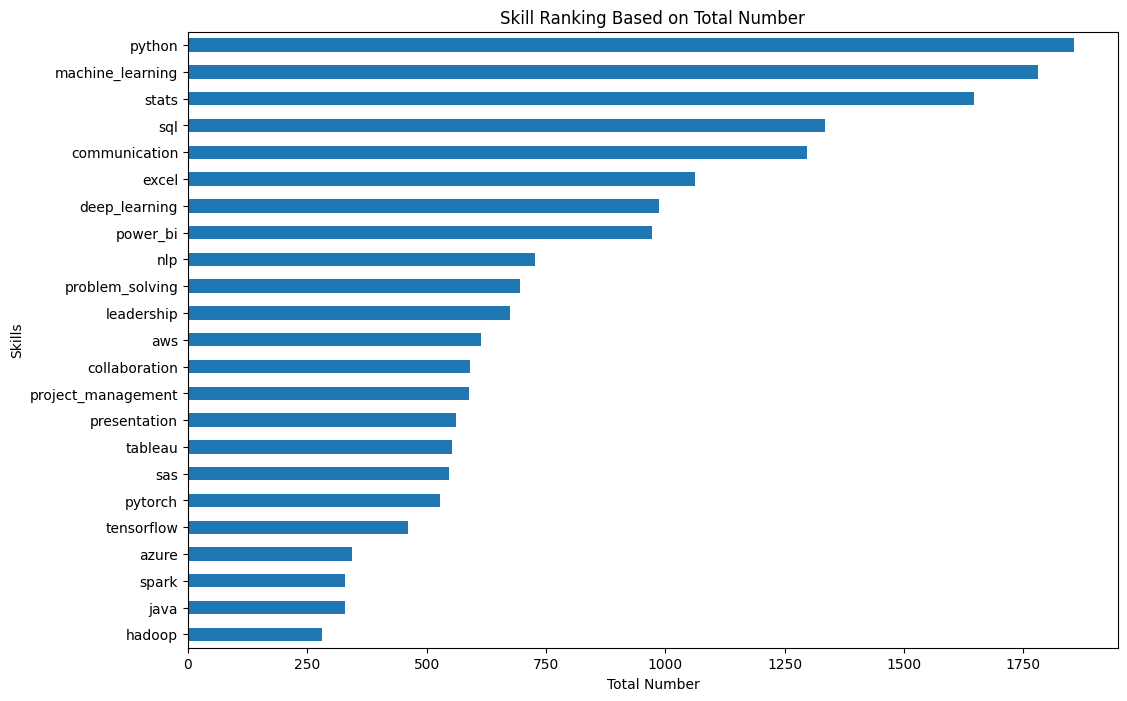

In [ ]:
column_ranking = skills_data.sum().sort_values(ascending=True)

# Plot the bar plot
column_ranking.plot(kind='barh', figsize=(12, 8))
plt.title('Skill Ranking Based on Total Number')
plt.xlabel('Total Number')
plt.ylabel('Skills')
plt.show()

###Here, let's experiment word embedding on location information

#####Now, let's experiment how word embedding can help cluster information, for example, the location information.


A dataframe 'df' is created for the testing purpose. Word2Vec is used to transform the location information into vector representations, then, KMeans clustering algorithm is appled using the optimal k value.

In [ ]:
df = data_backup.copy()
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
nltk.download('punkt')

locations = df['Location']

# Tokenization
tokenized_locations = [word_tokenize(location) for location in locations]

# Word2Vec training
model = Word2Vec(sentences=tokenized_locations, vector_size=100, window=5, min_count=1, workers=4)

# Aggregation (using average in this example)
def aggregate_vector(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return sum(vectors) / len(vectors)
    else:
        return None

df['Location_Vector'] = [aggregate_vector(tokens, model) for tokens in tokenized_locations]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# df.head()

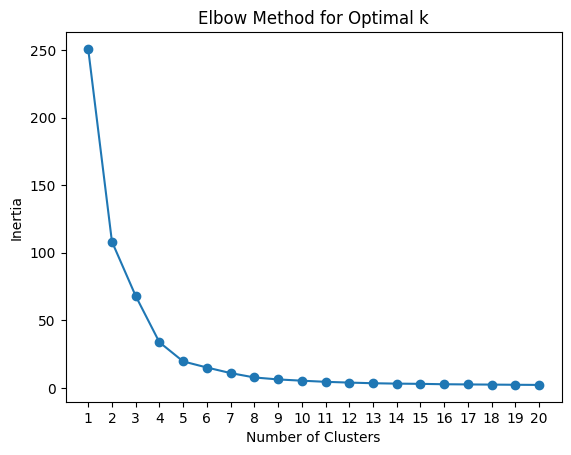

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

X = np.vstack(df['Location_Vector'].dropna())  # Stack the vectors into a numpy array

# Assuming X is your data
inertia = []
n_c = 20

for k in range(1, n_c+1):
    kmeans = KMeans(n_clusters=k,n_init=10,random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow
plt.plot(range(1, n_c+1), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, n_c+1))
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
# Choose the number of clusters (according to the elbow plot, the optimal k value is 5)
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters,n_init=10,random_state=0)
df['Location_Cluster'] = kmeans.fit_predict(X)

In [ ]:
print(df[df['Location_Cluster'] == 1]['Location'].unique()) # display the location information in each cluster from 0 to 4

['Palo Alto, CA 94301\xa0(University South area)'
 'Columbus, OH 43210\xa0(West Campus area)'
 'San Jose, CA 95110\xa0(Downtown area)'
 'Redmond, WA 98052\xa0(Overlake area)' 'Palo Alto, CA\xa0(Ventura area)'
 'Washington, DC 20032\xa0(Anacostia area)'
 'San Francisco, CA 94104\xa0(Financial District area)'
 'New York, NY 10014\xa0(SoHo area)' 'Dallas, TX 75201\xa0(Downtown area)'
 'Menlo Park, CA' 'Riverside, CA 92521\xa0(University area)'
 'Menlo Park, CA 94025\xa0(Lorelei Manor area)'
 'Washington, DC 20001\xa0(Shaw area)'
 'New York, NY 10010\xa0(NoMad area)'
 'San Jose, CA 95131\xa0(North Valley area)'
 'Bellevue, WA 98004\xa0(Downtown area)'
 'Washington, DC 20420\xa0(Downtown area)'
 'Seattle, WA 98104\xa0(Downtown area)'
 'Manhattan, NY 10004\xa0(Financial District area)'
 'Dallas, TX 75202\xa0(Downtown area)' 'Culver City, CA'
 'Houston, TX 77035\xa0(Meyerland area)'
 'Atlanta, GA 30308\xa0(Downtown area)'
 'Austin, TX\xa0(West Oak Hill area)'
 'Portland, ME 04101\xa0(Downtown

#####(GPU) Let's try BERT on location information.

In [ ]:
df = data_backup.copy()
import pandas as pd
from transformers import AutoTokenizer, AutoModel
import torch

# Extract the 'Location' column
strategies = df['Location'].tolist()

# Load the Legal-BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased')

# # Move model to GPU
# model = model.to('cuda')

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to the device (GPU or CPU)
model = model.to(device)

# Function to encode text to embeddings
def encode(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].cpu().numpy()

# Apply the encoding function to each item in the 'Strategy' column
embeddings = [encode(text) for text in strategies]

# Add the BERT embeddings to the DataFrame
df['Location_Vector'] = embeddings

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

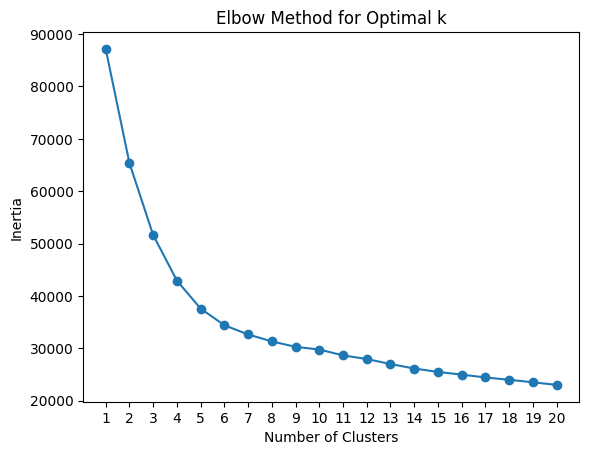

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

X = np.vstack(df['Location_Vector'].dropna())  # Stack the vectors into a numpy array

# Assuming X is your data
inertia = []
n_c = 20

for k in range(1, n_c+1):
    kmeans = KMeans(n_clusters=k,n_init=10,random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow
plt.plot(range(1, n_c+1), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, n_c+1))
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
# Choose the number of clusters (according to the elbow plot, the optimal k value is 5)
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters,n_init=10,random_state=0)
df['Location_Cluster'] = kmeans.fit_predict(X)

In [ ]:
print(df[df['Location_Cluster'] == 1]['Location'].unique()) # display the location information in each cluster from 0 to 4

['Boston, MA' 'Seattle, WA' 'Medina, MN' 'Wellesley, MA' 'Bethesda, MD'
 'Pasadena, CA' 'Washington, DC' 'New York, NY' 'Fort Meade, MD'
 'Remote in New York, NY' 'Santa Clara, CA' 'Glendale, CA' 'Latham, IL'
 'Montgomery County, MD' 'Pleasanton, CA' 'Astoria, OR' 'Maplewood, MN'
 'San Francisco, CA' 'Atlanta, GA' 'Irving, TX' 'Kīhei, HI'
 'Cambridge, MA' 'Palo Alto, CA' 'Cupertino, CA' 'Reston, VA'
 'Philadelphia, PA' 'Alpharetta, GA' 'San Francisco Bay Area, CA'
 'Austin, TX' 'Watertown, MA' 'Charlottesville, VA' 'Emeryville, CA'
 'San Bruno, CA' 'Hartford, CT' 'Santa Barbara County, CA' 'Frisco, TX'
 'Indianapolis, IN' 'Cincinnati, OH' 'Remote in San Francisco, CA'
 'Fairless Hills, PA' 'Woodland Hills, CA' 'Bossier City, LA'
 'Santa Monica, CA' 'Macdill AFB, FL' 'Panorama City, CA 91402'
 'Quantico, VA' 'Bellevue, WA' 'Lake Charles, LA' 'Denver, CO'
 'Manassas, VA' 'Menlo Park, CA' 'Fremont, CA' 'Piscataway, NJ'
 'Conshohocken, PA' 'Coppell, TX' 'Naperville, IL' 'Los Angeles, CA'
 

According to result above, the location information are clustered based on their format instead of actual geographical information (e.g., cities in MA should be clustered together). The reason for that is the Word2Vec model hasn't been trained on the U.S. geographical information.

Therefore, I decide to skip the time-consuming part of training a model to cluster the location information based on U.S. geographical information. I can mannually encode the location information based on the state and territory abbreviations.

###Here, let's experiment word embedding on job title information

#####Let's experiment on the job title column.

Try Word2Vec first

In [ ]:
df = data_backup.copy()
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
nltk.download('punkt')

locations = df['Title']

# Tokenization
tokenized_locations = [word_tokenize(location) for location in locations]

# Word2Vec training
model = Word2Vec(sentences=tokenized_locations, vector_size=10, window=4, min_count=1, workers=4)

# Aggregation (using average in this example)
def aggregate_vector(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return sum(vectors) / len(vectors)
    else:
        return None

df['Title_Vector'] = [aggregate_vector(tokens, model) for tokens in tokenized_locations]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# df.head()

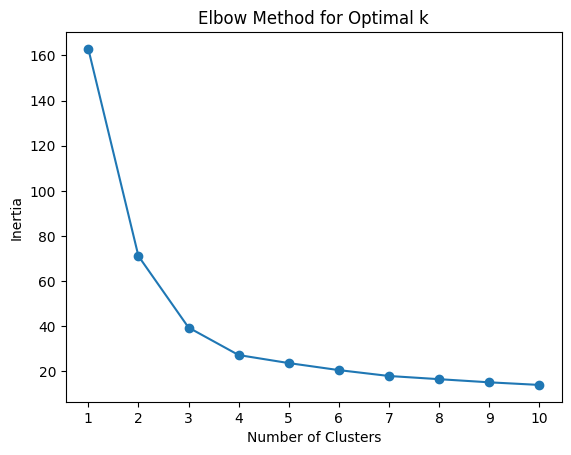

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

X = np.vstack(df['Title_Vector'].dropna())  # Stack the vectors into a numpy array

# Assuming X is your data
inertia = []
n_c = 10

for k in range(1, n_c+1):
    kmeans = KMeans(n_clusters=k,n_init=10,random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow
plt.plot(range(1, n_c+1), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, n_c+1))
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
# Choose the number of clusters (according to the elbow plot, the optimal k value is 4)
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters,n_init=10,random_state=0)
df['Title_Cluster'] = kmeans.fit_predict(X)

In [ ]:
print(df[df['Title_Cluster'] == 0]['Title'].unique()) # display the location information in each cluster from 0 to 3

['Data Scientist I' 'Data Scientist II' 'Sr Data Scientist'
 'Senior Data Scientist' 'Data Scientist (Commercial Strategy)'
 'Python Data Scientist' 'Data Scientist | ML' 'Sr. Data Scientist'
 'Data Scientist, Customer Experimentation'
 'Data Scientist, Systems Engineering'
 'Biological Science Assistant (Shellfish Sampler and Data Technician)'
 'Data Scientist ML/AI/LM/LMM (remote)' 'Data Scientist - All Levels'
 'Senior Data Scientist, Member Experience'
 '2024 University Graduate - Machine Learning Engineer'
 'Remote Data Scientist' 'Data Scientist / Analyst'
 'Software Engineer II - AI Compilers'
 'Data Scientist I / Data Scientist II - Clinical Operations'
 'DOES: Data Scientist (LMI)'
 'Data Scientist I or II - Card Fraud Analytics'
 'Staff Applied Data Scientist'
 'Data Engineer/Computer Scientist (Public Trust Clearance)'
 'Senior Data Scientist, Delivery' 'Associate Data Scientist'
 'Sr. Data Scientist, Charging Data Modeling'
 'Senior Data Scientist - Copilot' 'Data Scientist

#####(GPU) Let's try BERT on job title

In [ ]:
df = data_backup.copy()
import pandas as pd
from transformers import AutoTokenizer, AutoModel
import torch

# Extract the 'Title' column
strategies = df['Title'].tolist()

# Load the Legal-BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('marianodo/labels-per-job-title-fine-tune') # jjzha/jobbert_skill_extraction

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to the device (GPU or CPU)
model = model.to(device)

# Function to encode text to embeddings
def encode(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].cpu().numpy()

# Apply the encoding function to each item in the 'Strategy' column
embeddings = [encode(text) for text in strategies]

# Add the BERT embeddings to the DataFrame
df['Title_Vector'] = embeddings

config.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

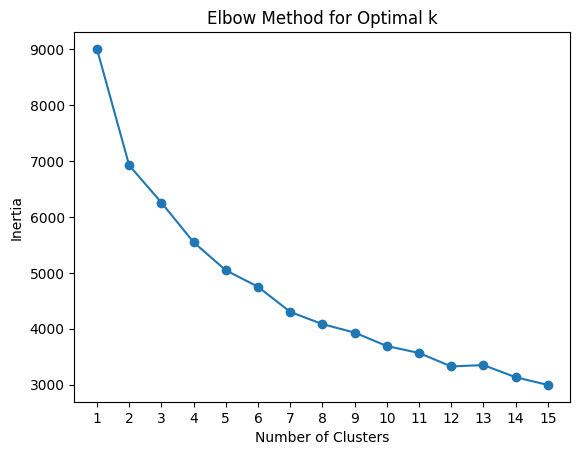

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

X = np.vstack(df['Title_Vector'].dropna())  # Stack the vectors into a numpy array

# Assuming X is your data
inertia = []
n_c = 15

for k in range(1, n_c+1):
    kmeans = KMeans(n_clusters=k,n_init=10,random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow
plt.plot(range(1, n_c+1), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, n_c+1))
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
# Choose the number of clusters (according to the elbow plot, the optimal k value is 4)
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters,n_init=10,random_state=0)
df['Title_Cluster'] = kmeans.fit_predict(X)

In [ ]:
print(df[df['Title_Cluster'] == 1]['Title'].unique()) # display the location information in each cluster from 0 to 3

['Data Scientist, Core AI'
 'Senior Machine Learning Engineer - Data Automation'
 'AI/ML Operations Engineer' 'Associate, Data Science'
 'Machine Learning Data Scientist' 'Senior Data Scientist'
 'AI/Data Scientist' 'Data Scientist (-)'
 'Data Scientist (Commercial Strategy)'
 'Rotational Development Program: Data Scientist'
 'College Graduate - Data Science (BS/MS)' 'Remote Sensing Data Scientist'
 'Data Scientist (entry-level)'
 'Biological Science Assistant (Shellfish Sampler and Data Technician)'
 'AI Data Scientist' 'Data Scientist Specialist/Bioinformatics Specialist'
 'Data Scientist - All Levels' 'Climate Data Scientist'
 'Manager, Product Manager, Machine Learning Experience'
 '2024 University Graduate - Machine Learning Engineer'
 'Data Science Mentors' 'Entry-Level Data Scientist'
 'PDC JUNIOR DATA SCIENTIST – ID# 223758' 'R&D Data Scientist'
 'Data Scientist - Fraud' 'Software Engineer II - AI Compilers'
 'Biological Data Scientist' 'IS Engineer, Data Scientist - Police (10

Similar to the location information case, the result is not ideal.

I can mannully classify the job titles to the following group, for example: senior, junior, co-op

###Here, let's generate two visual depictions of the information I have collected and extracted.

#####Firstly, do mannual encoding for job titles

Let's get the frequent words in job titles

In [ ]:
# Download NLTK resources
nltk.download('stopwords')

# Drop NaN entry
descriptions = data['Title'].dropna()

# Preprocess the text data
stop_words = set(stopwords.words('english'))
processed_descriptions = []

for description in descriptions:
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', description)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    words = [word for word in text.split() if word not in stop_words]
    processed_descriptions.append(' '.join(words))

# Create a document-term matrix using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(processed_descriptions)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Sum up the counts to get the most common words (assumed to be skills)
word_counts = X.sum(axis=0)
most_common_words = [(word, word_counts[0, idx]) for word, idx in zip(feature_names, range(len(feature_names)))]

# Sort the words by count
sorted_words = sorted(most_common_words, key=lambda x: x[1], reverse=True)

# Extract the top N words (adjust N as needed)
hot_words = [word[0] for word in sorted_words[0:2000]]  # hot words

print(hot_words)

['data', 'scientist', 'senior', 'analyst', 'learning', 'machine', 'ai', 'engineer', 'sr', 'staff', 'science', 'generative', 'manager', 'ii', 'remote', 'modeling', 'principal', 'analytics', 'applied', 'llm', 'expert', 'language', 'large', 'models', 'nlp', 'aiml', 'product', 'lead', 'risk', 'member', 'technical', 'advanced', 'infrastructure', 'program', 'credit', 'multiple', 'development', 'ihm', 'openings', 'shape', 'clinical', 'business', 'experience', 'midlevel', 'ml', 'research', 'safety', 'wrangler', 'assurance', 'operations', 'systems', 'statistics', 'poly', 'tssci', 'decision', 'hewlett', 'labs', 'packard', 'client', 'computational', 'cybersecurity', 'dl', 'healthcare', 'full', 'services', 'biology', 'fill', 'immediate', 'leader', 'providerdata', 'required', 'scope', 'epic', 'im', 'junior', 'reporting', 'support', 'intelligence', 'optimization', 'recommendations', 'associate', 'fraud', 'leadsenior', 'python', 'software', 'specialist', 'erp', 'iii', 'structured', 'cloud', 'genai', 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Let's classify the job titles based on the following levels derived from the "hot words" above:

1. level 0: coop, student
2. level 1: junior, associate, jr, entry, entrylevel
3. level 2: senior, sr, iii
4. level 3: staff, manager, lead, chief, president

Level 0 refers to the student job (such as co-op/intern), level 1 refers to the early career to mid-level full time job (such as 'Data Scientist', 'Data Scientist I/II'), level 2 refers to the senior level job (such as 'Senior Data Scientist', 'Data Scientist III'), level 3 refers to more senior to upper management level job (such as 'VP,...', 'Lead,...').

The title column is ordinal encoded to a new column called 'Title_value'.

In [ ]:
data = data_backup.copy()
# Keywords for different levels
level_0 = ['coop', 'student', 'co-op', 'intern', 'internship']
level_1 = ['junior', 'associate', 'jr', 'entry', 'entry-level', 'mid-level', 'early', 'jr.']
level_2 = ['senior', 'sr', 'iii', 'sr.']
level_3 = ['staff', 'manager', 'lead', 'chief', 'president', 'vp', 'principal', 'head']

# Function to assign values based on keywords
def job_level(title):
    words = re.split(r'\s|,', title.lower()) # Split the title into words and convert to lowercase
    if any(keyword in words for keyword in level_0):
        return 0
    elif any(keyword in words for keyword in level_1):
        return 1
    elif any(keyword in words for keyword in level_2):
        return 2
    elif any(keyword in words for keyword in level_3):
        return 3
    else:
        return 1 # other titles that don't have the list key words look mostly like 'Data Scientist', 'Data Scientist I/II'. They would be considered as the level 1 jobs

# level_1_l2 = ['ii']
# level_2_l2 = ['iii']

# def job_level_layer2(title):
#     if any(keyword in title.lower() for keyword in level_2_l2):
#         return 2

# Apply the function to create the 'Title_value' column
data['Title_value'] = data['Title'].apply(job_level)

# Apply the second layer function to the same column
# data['Title_value'] = data['Title_value'].fillna(data['Title'].apply(job_level_layer2))


In [ ]:
# data.head()
# data['Title_value'].isna().sum()

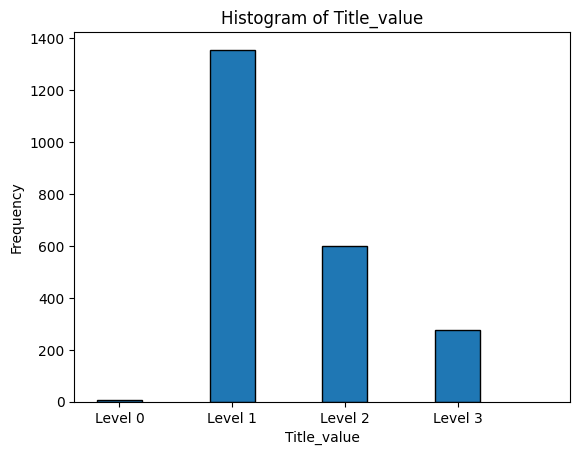

In [ ]:
bar_width = 0.4
# Define levels and calculate bin edges
levels = ['Level 0', 'Level 1', 'Level 2', 'Level 3']
bin_edges = [i - bar_width/2 for i in range(len(levels) + 1)]

# Plotting histogram and specifying bin edges
plt.hist(data['Title_value'].dropna(), bins=bin_edges, edgecolor='black', width=bar_width)

# Adding labels and title
plt.xlabel('Title_value')
plt.ylabel('Frequency')
plt.xticks(range(len(levels)), levels)
plt.title('Histogram of Title_value')

# Show the plot
plt.show()

#####Secondly, do mannual encoding for location

The encoding method used here is

In [ ]:
us_states = [
    ("Alabama", "AL"),
    ("Alaska", "AK"),
    ("Arizona", "AZ"),
    ("Arkansas", "AR"),
    ("American Samoa", "AS"),
    ("California", "CA"),
    ("Colorado", "CO"),
    ("Connecticut", "CT"),
    ("Delaware", "DE"),
    ("District of Columbia", "DC"),
    ("Florida", "FL"),
    ("Georgia", "GA"),
    ("Guam", "GU"),
    ("Hawaii", "HI"),
    ("Idaho", "ID"),
    ("Illinois", "IL"),
    ("Indiana", "IN"),
    ("Iowa", "IA"),
    ("Kansas", "KS"),
    ("Kentucky", "KY"),
    ("Louisiana", "LA"),
    ("Maine", "ME"),
    ("Maryland", "MD"),
    ("Massachusetts", "MA"),
    ("Michigan", "MI"),
    ("Minnesota", "MN"),
    ("Mississippi", "MS"),
    ("Missouri", "MO"),
    ("Montana", "MT"),
    ("Nebraska", "NE"),
    ("Nevada", "NV"),
    ("New Hampshire", "NH"),
    ("New Jersey", "NJ"),
    ("New Mexico", "NM"),
    ("New York", "NY"),
    ("North Carolina", "NC"),
    ("North Dakota", "ND"),
    ("Northern Mariana Islands", "MP"),
    ("Ohio", "OH"),
    ("Oklahoma", "OK"),
    ("Oregon", "OR"),
    ("Pennsylvania", "PA"),
    ("Puerto Rico", "PR"),
    ("Rhode Island", "RI"),
    ("South Carolina", "SC"),
    ("South Dakota", "SD"),
    ("Tennessee", "TN"),
    ("Texas", "TX"),
    ("Trust Territories", "TT"),
    ("Utah", "UT"),
    ("Vermont", "VT"),
    ("Virginia", "VA"),
    ("Virgin Islands", "VI"),
    ("Washington", "WA"),
    ("West Virginia", "WV"),
    ("Wisconsin", "WI"),
    ("Wyoming", "WY")
] # here's a list of U.S. states and their abbreviation

def extract_location_category(location):
    location_words = re.findall(r'\b\w+\b', location.lower())

    for state_name, state_abbr in us_states:
        state_name_words = re.findall(r'\b\w+\b', state_name.lower())
        if all(word in location_words for word in state_name_words) or state_abbr.lower() in location_words:
            return state_abbr

    if 'remote' in location_words:
        return 'Remote'
    else:
        return np.NaN  # If no state name, state abbreviation, or 'remote' is found in the location

# Apply the function to the 'Location' column
data['Location_abbr'] = data['Location'].apply(extract_location_category)

In [ ]:
# data.head()
# data['Location_abbr'].isna().sum()
# data[pd.isnull(data['Location_abbr'])]

In [ ]:
# locations_list = data['Location_abbr'].unique().tolist()

# # Use get_dummies to create one-hot encoded vectors
# location_vectors = pd.get_dummies(data['Location_abbr'], columns=locations_list)

# # Assign vectors to the 'Location_value' columns in the original DataFrame
# data['Location_value'] = list(location_vectors.values)

# Calculate the frequency of each location name
location_frequencies = data['Location_abbr'].value_counts()

# Map the frequencies to the original DataFrame
data['Location_value'] = data['Location_abbr'].map(location_frequencies)

In [ ]:
data.head()
# data['Company'].isna().sum()
# unique_companies = data['Company'].unique().tolist()
# print(len(unique_companies))

,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions,Salary_value,Title_value,Location_abbr,Location_value
0,"Data Scientist, Core AI",Indeed,Remote,NaN,EmployerActive 3 days ago,"$122,000 - $178,000 a year",Participate in code review and process innovat...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Our Mission\nAs the world’s number 1 job site*...,150000.0,1,Remote,383
1,Senior Machine Learning Engineer - Data Automa...,Bloomberg,"New York, NY 10261",NaN,EmployerActive 15 days ago,"$165,000 - $260,000 a year",Familiarity with SQL and NoSQL data modeling a...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"What we do:\nOn the Data Automation team, we d...",212500.0,2,NY,89
2,Data Scientist,Boston Medical Center,"Boston, MA",NaN,PostedToday,NaN,Understand health system data sources and supp...,https://www.indeed.com/rc/clk?jk=205f1e6dec985...,This opening is for individuals who love worki...,NaN,1,MA,69
3,Jr. Data Scientist,ClimateAI,Remote,NaN,PostedPosted 30+ days ago,NaN,Background in data analysis and machine learni...,https://www.indeed.com/rc/clk?jk=f420fd336c4b8...,Culture\nAt ClimateAi we are driven by a unite...,NaN,1,Remote,383
4,Data Scientist - Remote,Optum,"Remote in Plymouth, MN 55441",NaN,PostedPosted 2 days ago,"$67,800 - $133,100 a year",You will advise on process improvement by iden...,https://www.indeed.com/rc/clk?jk=152e6cd22235c...,Optum is a global organization that delivers c...,100450.0,1,IN,404


#####Thirdly, do the mannual encodinig for company

The same method is used.

In [ ]:
# company_list = data['Company'].unique().tolist()

# # Use get_dummies to create one-hot encoded vectors
# company_vectors = pd.get_dummies(data['Company'], columns=company_list)

# # Assign vectors to the 'Company_value' columns in the original DataFrame
# data['Company_value'] = list(company_vectors.values)

# Calculate the frequency of each location name
location_frequencies = data['Company'].value_counts()

# Map the frequencies to the original DataFrame
data['Company_value'] = data['Company'].map(location_frequencies)

In [ ]:
data.head()

,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions,Salary_value,Title_value,Location_abbr,Location_value,Company_value
0,"Data Scientist, Core AI",Indeed,Remote,NaN,EmployerActive 3 days ago,"$122,000 - $178,000 a year",Participate in code review and process innovat...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Our Mission\nAs the world’s number 1 job site*...,150000.0,1,Remote,383,1
1,Senior Machine Learning Engineer - Data Automa...,Bloomberg,"New York, NY 10261",NaN,EmployerActive 15 days ago,"$165,000 - $260,000 a year",Familiarity with SQL and NoSQL data modeling a...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"What we do:\nOn the Data Automation team, we d...",212500.0,2,NY,89,1
2,Data Scientist,Boston Medical Center,"Boston, MA",NaN,PostedToday,NaN,Understand health system data sources and supp...,https://www.indeed.com/rc/clk?jk=205f1e6dec985...,This opening is for individuals who love worki...,NaN,1,MA,69,1
3,Jr. Data Scientist,ClimateAI,Remote,NaN,PostedPosted 30+ days ago,NaN,Background in data analysis and machine learni...,https://www.indeed.com/rc/clk?jk=f420fd336c4b8...,Culture\nAt ClimateAi we are driven by a unite...,NaN,1,Remote,383,3
4,Data Scientist - Remote,Optum,"Remote in Plymouth, MN 55441",NaN,PostedPosted 2 days ago,"$67,800 - $133,100 a year",You will advise on process improvement by iden...,https://www.indeed.com/rc/clk?jk=152e6cd22235c...,Optum is a global organization that delivers c...,100450.0,1,IN,404,1


#####Lastly, perform word embedding for the 'Descriptions' column.

Since the assignment requires at least one feature that uses text embeddings, I choose to text embede the 'Descriptions'.

In [ ]:
df = data_backup.copy()
import pandas as pd
from transformers import AutoTokenizer, AutoModel
import torch

# Extract the 'Title' column
strategies = df['Descriptions'].tolist()

# Load the Legal-BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('tkuye/job-description-classifier') # jjzha/jobbert_skill_extraction

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to the device (GPU or CPU)
model = model.to(device)

# Function to encode text to embeddings
def encode(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].cpu().numpy()

# Apply the encoding function to each item in the 'Strategy' column
embeddings = [encode(text) for text in strategies]

# Add the BERT embeddings to the DataFrame
df['Descriptions_Vector'] = embeddings

config.json:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/469M [00:00<?, ?B/s]

In [ ]:
data['Descriptions_value'] = df['Descriptions_Vector']

In [ ]:
data.head()

,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions,Salary_value,Title_value,Location_abbr,Location_value,Company_value,Descriptions_value
0,"Data Scientist, Core AI",Indeed,Remote,NaN,EmployerActive 3 days ago,"$122,000 - $178,000 a year",Participate in code review and process innovat...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Our Mission\nAs the world’s number 1 job site*...,150000.0,1,Remote,383,1,"[[2.072727, 1.0629374, -0.20046929, -1.1122099..."
1,Senior Machine Learning Engineer - Data Automa...,Bloomberg,"New York, NY 10261",NaN,EmployerActive 15 days ago,"$165,000 - $260,000 a year",Familiarity with SQL and NoSQL data modeling a...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"What we do:\nOn the Data Automation team, we d...",212500.0,2,NY,89,1,"[[1.8314484, -0.2158476, -1.4999312, -2.063086..."
2,Data Scientist,Boston Medical Center,"Boston, MA",NaN,PostedToday,NaN,Understand health system data sources and supp...,https://www.indeed.com/rc/clk?jk=205f1e6dec985...,This opening is for individuals who love worki...,NaN,1,MA,69,1,"[[2.2615354, 0.7842383, -0.12465327, -1.822420..."
3,Jr. Data Scientist,ClimateAI,Remote,NaN,PostedPosted 30+ days ago,NaN,Background in data analysis and machine learni...,https://www.indeed.com/rc/clk?jk=f420fd336c4b8...,Culture\nAt ClimateAi we are driven by a unite...,NaN,1,Remote,383,3,"[[1.5513496, 0.25035486, -0.9992604, -2.129232..."
4,Data Scientist - Remote,Optum,"Remote in Plymouth, MN 55441",NaN,PostedPosted 2 days ago,"$67,800 - $133,100 a year",You will advise on process improvement by iden...,https://www.indeed.com/rc/clk?jk=152e6cd22235c...,Optum is a global organization that delivers c...,100450.0,1,IN,404,1,"[[2.0677228, 1.1489697, -0.8199747, -0.6473342..."


Now, all useful columns in 'data' have been encoded. Information such as 'Links', 'Description', 'Date', are not as useful compared to the encoded ones, therefore, they are disregarded. Let's finally generate the two visual depictions of the information.

In [ ]:
salary_data = data.copy()
salary_data = salary_data.dropna(subset=['Salary_value'])

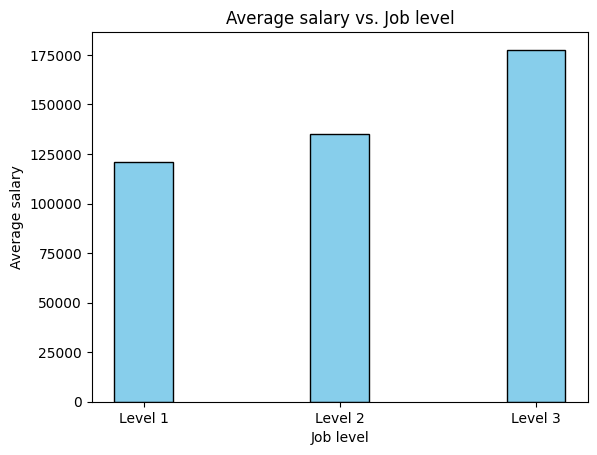

In [ ]:
job_level_list = salary_data['Title_value'].unique().tolist()

# Dictionary to store average salaries for each numerical label
average_salaries = {}

# Calculate the average salary for each numerical label
for job_level in job_level_list:
    average_salary = salary_data[salary_data['Title_value'] == job_level]['Salary_value'].mean()
    average_salaries[job_level] = average_salary

# Extract keys and values
keys = list(average_salaries.keys())
values = list(average_salaries.values())

# Plotting bar plot
plt.bar(keys, values, color='skyblue', edgecolor='black', width=0.3)

# Adding labels and title
plt.xlabel('Job level')
plt.xticks(keys, ['Level 1', 'Level 2', 'Level 3'])
plt.ylabel('Average salary')
plt.title('Average salary vs. Job level')

# Show the plot
plt.show()

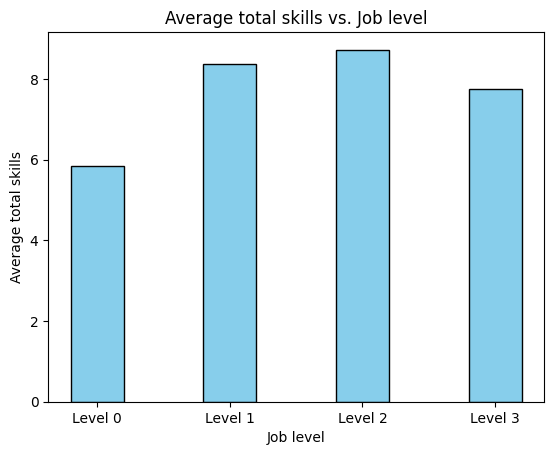

In [ ]:
job_level_list = [0,1,2,3]

# Dictionary to store average total skills for each numerical label
average_skills = {}

# Calculate the average total skills for each numerical label
for job_level in job_level_list:
    # Select rows with the specific job level
    selected_rows = skills_data[data['Title_value'] == job_level]

    # Calculate the average total skills for the selected job level
    average_total_skills = np.mean(selected_rows.sum(axis=1))  # Sum across skills for each row
    average_skills[job_level] = average_total_skills

# Extract keys and values
keys = list(average_skills.keys())
values = list(average_skills.values())

# Plotting bar plot
plt.bar(keys, values, color='skyblue', edgecolor='black', width=0.4)

# Adding labels and title
plt.xlabel('Job level')
plt.xticks(keys, ['Level 0','Level 1', 'Level 2', 'Level 3'])
plt.ylabel('Average total skills')
plt.title('Average total skills vs. Job level')

# Show the plot
plt.show()

Due to a substantial number of missing values in the 'Salary' column (only 678 out of 2236 entries have values), I decide to exclude the 'Salary_value' column from the features used for subsequent clustering (K-Means or DBSCAN). This decision is based on the observation of a clear positive relationship between salary and job level in the plot of Average Salary vs. Job Level. Although there's no salary data for level 0, we can assume that Level 0 would have the lowest average salary, aligning with real-world expectations. In short, the 'Title_value' column reflects the salary level to some extent.

#3. Hierarchical clustering implementation

Use cramer's v to visualize the association between the skills

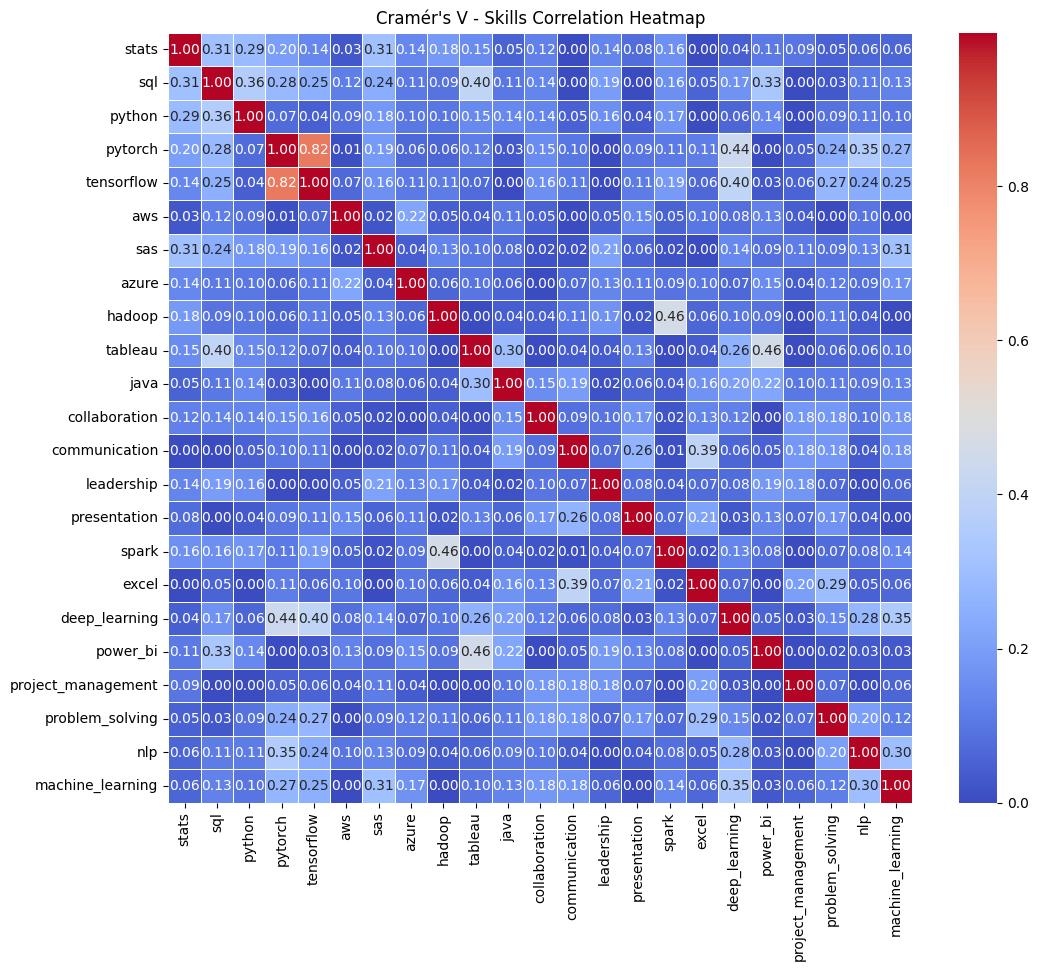

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'skills_data' is your DataFrame with binary skills data
# Calculate Cramér's V for each pair of skills
def cramers_v(x1, x2):
    confusion_matrix = pd.crosstab(x1, x2)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate Cramér's V for all pairs of skills
skills_corr_matrix = pd.DataFrame(index=skills_data.columns, columns=skills_data.columns)
for skill1 in skills_data.columns:
    for skill2 in skills_data.columns:
        skills_corr_matrix.loc[skill1, skill2] = cramers_v(skills_data[skill1], skills_data[skill2])

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(skills_corr_matrix.astype(float), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Cramér's V - Skills Correlation Heatmap")
plt.show()

From the heatmap above, only tensorflow and pytorch are closely related to each other. that make sense, as they are usually used together.

Now, let's combine tensorflow and pytorch into one skill called 'tf_torch'. Let's revise the skills_data.

In [ ]:
skills_data2 = skills_data.copy()
skills_data2['tf_torch'] = (skills_data2['pytorch'] | skills_data2['tensorflow']).astype(int)
skills_data2.drop(['pytorch', 'tensorflow'], axis=1, inplace=True)

Redo the distance matrix and hierarchical clustering

In [ ]:
from sklearn.metrics import pairwise_distances
# Transpose the DataFrame to have skills as rows
skills_data_transposed = skills_data2.transpose()

# Compute the distance matrix using pairwise_distances
distance_matrix = pairwise_distances(skills_data_transposed, metric='euclidean')

# Convert the distance matrix to a DataFrame for better visualization
distance_df = pd.DataFrame(distance_matrix, index=skills_data2.columns, columns=skills_data2.columns)

In [ ]:
distance_df # a distance matrix for to describe the relationship between skills

,stats,sql,python,aws,sas,azure,hadoop,tableau,java,collaboration,...,presentation,spark,excel,deep_learning,power_bi,project_management,problem_solving,nlp,machine_learning,tf_torch
stats,0.000000,26.795522,23.579652,37.242449,33.570821,39.812058,37.309516,35.425979,38.091994,38.418745,...,36.221541,37.107951,33.882149,35.057096,32.863353,35.832946,36.972963,36.918830,29.274562,39.306488
sql,26.795522,0.000000,26.038433,33.090784,31.575307,34.365681,34.813790,29.103264,34.452866,36.796739,...,35.298725,33.867388,34.554305,36.428011,28.035692,35.213634,35.171011,36.207734,33.211444,38.535698
python,23.579652,26.038433,0.000000,37.188708,36.918830,39.534795,40.149720,37.161808,39.408121,39.597980,...,38.935845,39.153544,34.029399,33.926391,33.075671,38.340579,36.400549,35.874782,24.758837,37.643060
aws,37.242449,33.090784,37.188708,0.000000,29.765752,24.657656,27.838822,28.740216,26.153394,30.479501,...,31.575307,26.870058,31.448370,31.240999,30.380915,28.965497,30.724583,29.120440,37.523326,28.948230
sas,33.570821,31.575307,36.918830,29.765752,0.000000,27.459060,24.596748,27.239677,25.651511,28.687977,...,27.946377,27.092434,33.000000,34.467376,30.967725,27.404379,31.400637,32.249031,41.182521,31.622777
azure,39.812058,34.365681,39.534795,24.657656,27.459060,0.000000,22.427661,25.651511,23.151674,27.513633,...,28.513155,22.759613,31.511903,31.144823,29.916551,27.982137,27.129320,30.232433,38.288379,26.038433
hadoop,37.309516,34.813790,40.149720,27.838822,24.596748,22.427661,0.000000,26.551836,22.383029,27.495454,...,26.076810,16.822604,33.526109,30.708305,30.692019,27.129320,26.925824,28.160256,40.037482,25.670995
tableau,35.425979,29.103264,37.161808,28.740216,27.239677,25.651511,26.551836,0.000000,22.671568,29.240383,...,30.773365,27.018512,32.357379,36.055513,24.637370,29.376862,29.086079,31.272992,39.115214,30.659419
java,38.091994,34.452866,39.408121,26.153394,25.651511,23.151674,22.383029,22.671568,0.000000,29.240383,...,27.730849,23.108440,30.773365,34.409301,29.000000,25.865034,27.092434,30.232433,40.865633,27.313001
collaboration,38.418745,36.796739,39.597980,30.479501,28.687977,27.513633,27.495454,29.240383,29.240383,0.000000,...,26.570661,27.730849,30.951575,30.545049,32.588341,26.645825,27.404379,28.896367,35.818989,27.110883


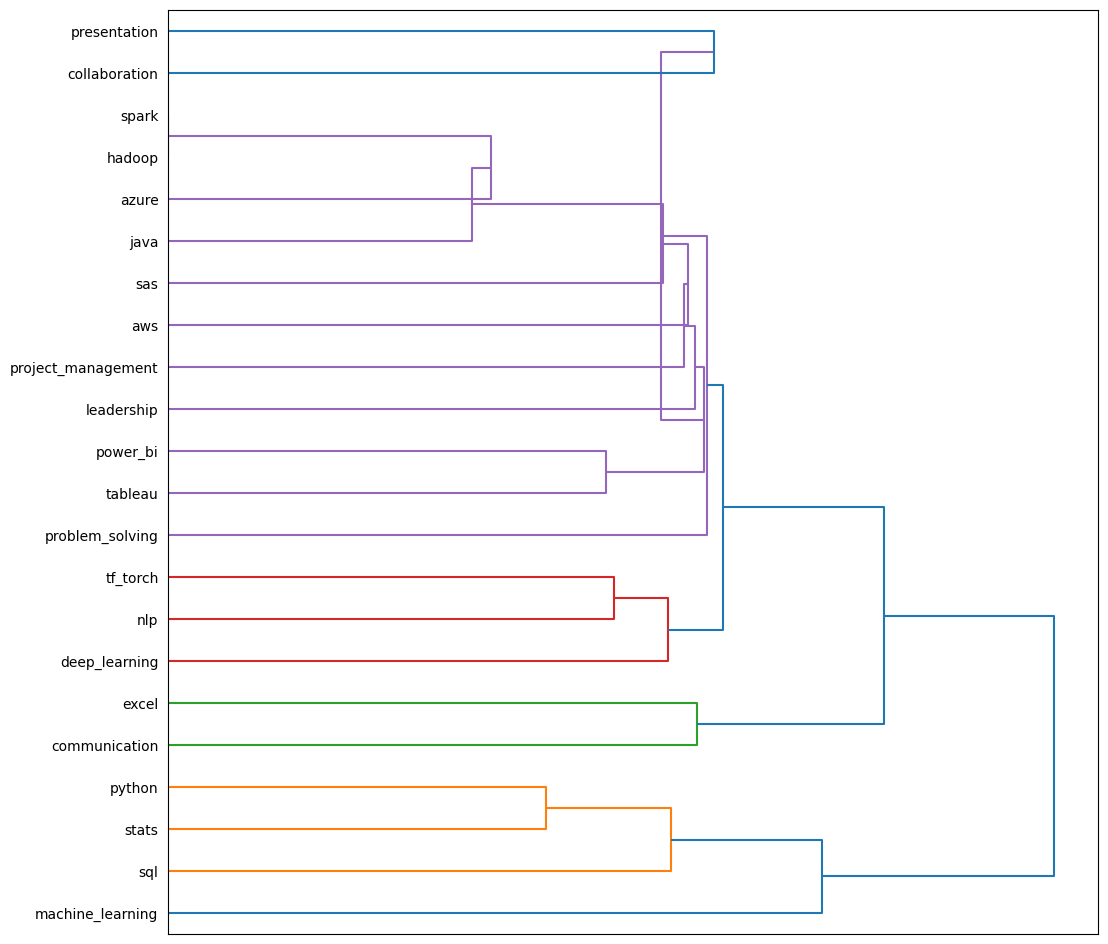

In [ ]:
a = skills_data2.values
threshold = 0.4 # the threshold for the hierarchy clustering
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import squareform

# Calculate the proximity matrix D
D = np.zeros([a.shape[1], a.shape[1]])

# Find all element-wise temp differences
for i in range(a.shape[1]):
    for j in range(a.shape[1]):
        if i != j:  # Exclude the diagonal elements
            # Calculate Euclidean distance between skills i and j for all job postings
            dist = 0
            for k in range(a.shape[0]):
                dist += (a[k, i] - a[k, j]) ** 2
            dist = np.sqrt(dist)
            D[i, j] = dist

D = squareform(D) # condensed distance

# D2 = distance_df.values # alternative proximity matrix
# D2 = squareform(D2) # condensed distance

min_value = np.min(D)
max_value = np.max(D)

# Min-Max scaling
normalized_D = (D - min_value) / (max_value - min_value)

# Perform hierarchical clustering
Y = sch.linkage(normalized_D, method='centroid')

# Plot the dendrogram
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, figsize=(12, 12))
# fig = plt.figure(figsize=(12, 12))
# axes = fig.add_axes([0.1, 0.1, 0.4, 0.6])

Z1 = sch.dendrogram(Y, orientation='right', color_threshold=threshold)
labels = skills_data2.columns[Z1['leaves']]
axes.set_xticks([])
axes.set_yticklabels(labels)

plt.show()  # Display the plot

#4. K-means and DBSCAN clustering implementation

#####Implement k-means clustering algorithm and DBSCAN clustering algorithm

In [ ]:
# Concatenate to get the features
feature_df = pd.concat([data[['Title_value', 'Location_value', 'Company_value', 'Descriptions_value']], skills_data2], axis=1)
feature_df_backup = feature_df.copy()

In [ ]:
feature_df.head()

,Title_value,Location_value,Company_value,Descriptions_value,stats,sql,python,aws,sas,azure,...,presentation,spark,excel,deep_learning,power_bi,project_management,problem_solving,nlp,machine_learning,tf_torch
0,1,383,1,"[[2.072727, 1.0629374, -0.20046929, -1.1122099...",1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,1
1,2,89,1,"[[1.8314484, -0.2158476, -1.4999312, -2.063086...",1,1,1,0,0,0,...,1,0,1,1,0,0,0,1,1,1
2,1,69,1,"[[2.2615354, 0.7842383, -0.12465327, -1.822420...",1,1,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
3,1,383,3,"[[1.5513496, 0.25035486, -0.9992604, -2.129232...",1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,404,1,"[[2.0677228, 1.1489697, -0.8199747, -0.6473342...",0,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


Before doing the clustering, let's scale the features to be between 0 and 1.

We don't need to touch the skills column from 'stats' to 'tf_torch' since they are already between 0 and 1.

For 'Title_value', 'Location_value', 'Company_value', apply StandardScaler().

For 'Descriptions_value', first use K-Means to determine the cluster label, then apply StandardScaler().

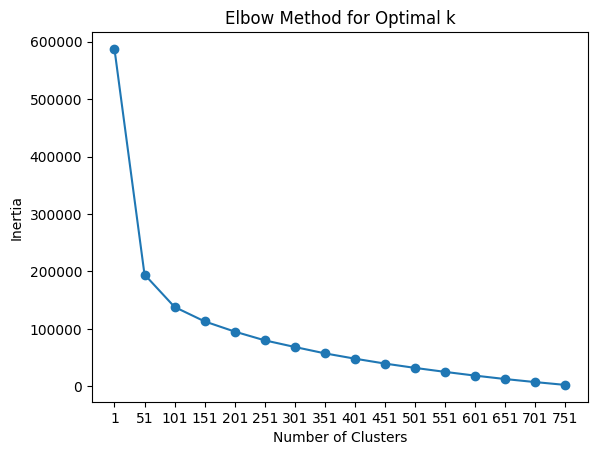

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

X = np.vstack(feature_df['Descriptions_value'].dropna())  # Stack the vectors into a numpy array

# Assuming X is your data
inertia = []
n_c = 780
ranges = range(1, n_c+1,50)

for k in ranges:
    kmeans = KMeans(n_clusters=k,n_init=10,random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow
plt.plot(ranges, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(ranges)
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
# Choose the number of clusters (according to the elbow plot, the optimal k value is around 100)
num_clusters = 100
kmeans = KMeans(n_clusters=num_clusters,n_init=10,random_state=0)
feature_df['Descriptions_value'] = kmeans.fit_predict(X)

In [ ]:
feature_df.head()

,Title_value,Location_value,Company_value,Descriptions_value,stats,sql,python,aws,sas,azure,...,presentation,spark,excel,deep_learning,power_bi,project_management,problem_solving,nlp,machine_learning,tf_torch
0,1,383,1,76,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,1
1,2,89,1,4,1,1,1,0,0,0,...,1,0,1,1,0,0,0,1,1,1
2,1,69,1,85,1,1,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
3,1,383,3,99,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,404,1,54,0,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Columns to scale
columns_to_scale = ['Title_value', 'Location_value', 'Company_value', 'Descriptions_value']

# Create a scaler instance
scaler = MinMaxScaler() # scale the variables to be between 0 and 1

# Fit and transform the selected columns
feature_df[columns_to_scale] = scaler.fit_transform(feature_df[columns_to_scale])

In [ ]:
feature_df.head()

,Title_value,Location_value,Company_value,Descriptions_value,stats,sql,python,aws,sas,azure,...,presentation,spark,excel,deep_learning,power_bi,project_management,problem_solving,nlp,machine_learning,tf_torch
0,0.333333,0.947891,0.000000,0.767677,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,1
1,0.666667,0.218362,0.000000,0.040404,1,1,1,0,0,0,...,1,0,1,1,0,0,0,1,1,1
2,0.333333,0.168734,0.000000,0.858586,1,1,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
3,0.333333,0.947891,0.028571,1.000000,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.333333,1.000000,0.000000,0.545455,0,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [ ]:
# feature_df.head()

Now, let's do DBSCAN or KMeans.

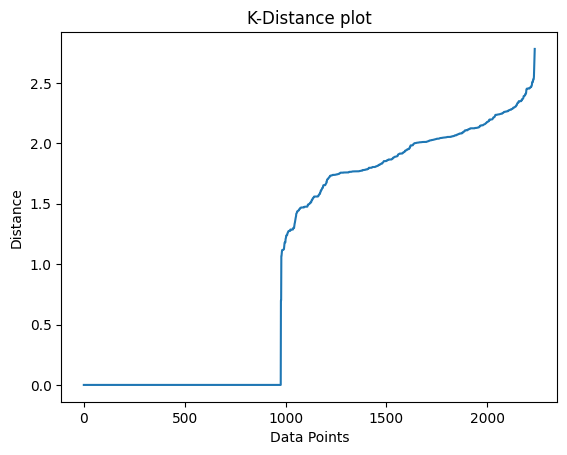

In [ ]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Fit a nearest neighbors model
neighbors_model = NearestNeighbors(n_neighbors=20)
neighbors_model.fit(feature_df.values)

# Get distances to k-th nearest neighbors
distances, _ = neighbors_model.kneighbors()

# Sort the distances
distances = np.sort(distances[:, -1])

# Plot the k-distance graph
plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('K-Distance plot')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
# Let's fine tune eps and min_samples
min_samples = range(10,30+1) # the range around the number of n_neighbors
eps = np.arange(0.1,2.8, 0.1) # the eps range according to the K-Distance plot
output = []

for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=ms, eps = ep).fit(feature_df.values).labels_
        num_clusters = len(set(labels))
        if num_clusters > 1:
            score = silhouette_score(feature_df.values, labels)
        else:
            score = 0

        output.append((ms, ep, score))

min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.43610181877971765
min_samples: 10
eps: 1.0


In [ ]:
# Create DBSCAN object
db = DBSCAN(eps=1, min_samples=10) # use the optimal parameter from above

# Train
db.fit(feature_df.values)

# Get output
mask = np.zeros_like(db.labels_, dtype=bool)
mask[db.core_sample_indices_] = True
labels = db.labels_ + 1 # make from range 0:5 instead of -1:4

In [ ]:
# Add labels to dataframe
feature_df['DBSCAN_label'] = labels

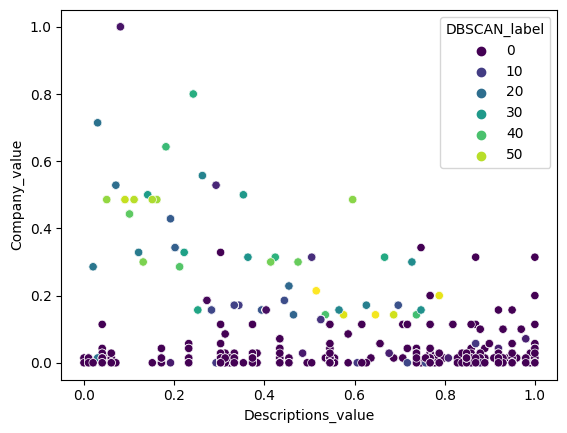

In [ ]:
sns.scatterplot(x=feature_df['Descriptions_value'], y=feature_df['Company_value'], hue=feature_df['DBSCAN_label'], palette='viridis') # visualize the clustering results
plt.show()

Let's try KMeans.

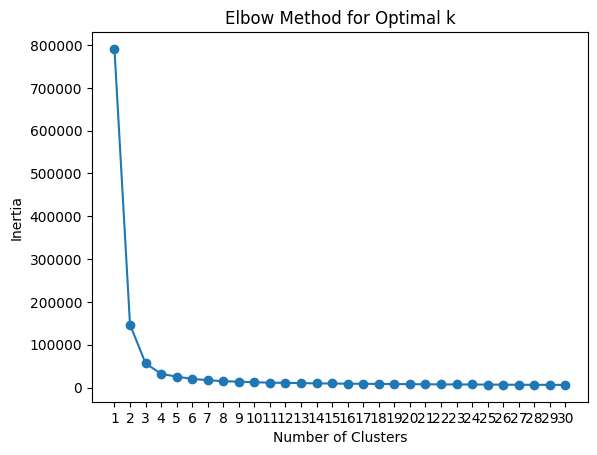

In [ ]:
X = feature_df.values # Stack the vectors into a numpy array

# Assuming X is your data
inertia = []
n_c = 30
ranges = range(1, n_c+1,1)

for k in ranges:
    kmeans = KMeans(n_clusters=k,n_init=10,random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow
plt.plot(ranges, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(ranges)
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
# Choose the number of clusters (according to the elbow plot, the optimal k value is 3)
X = feature_df.values
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters,n_init=10,random_state=0)
feature_df['KMeans_label'] = kmeans.fit_predict(X)

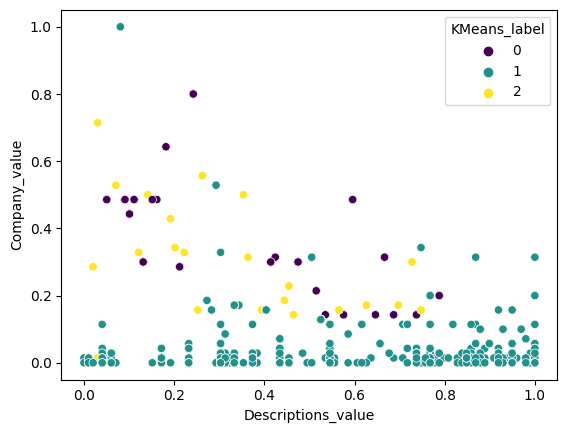

In [ ]:
sns.scatterplot(x=feature_df['Descriptions_value'], y=feature_df['Company_value'], hue=feature_df['KMeans_label'], palette='viridis') # visualize the clustering results
plt.show()

#####Develop a course curriculum based on clustering results

DBSCAN

In [ ]:
min_samples_values = range(1,100+1) # the range around the number of n_neighbors
eps_values = np.arange(0.1,3.0, 0.1) # the eps range according to the K-Distance plot
output = []

for ep in eps_values:
  for ms in min_samples_values:
    db = DBSCAN(eps=ep, min_samples=ms) # use the optimal parameter from above

    # Train
    db.fit(feature_df.values)

    # Get output
    mask = np.zeros_like(db.labels_, dtype=bool)
    mask[db.core_sample_indices_] = True
    labels = db.labels_ + 1 # make from range 0:5 instead of -1:4
    unique_labels = set(labels)
    if len(unique_labels) == 8:
      score = silhouette_score(feature_df.values, labels)
      output.append((ms, ep, score))

min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.05699954376327115
min_samples: 53
eps: 2.9000000000000004


In [ ]:
# Create DBSCAN object
db = DBSCAN(eps=2.9, min_samples=53) # use the optimal parameter from above

# Train
db.fit(feature_df.values)

# Get output
mask = np.zeros_like(db.labels_, dtype=bool)
mask[db.core_sample_indices_] = True
labels8 = db.labels_ + 1 # make from range 0:5 instead of -1:4

In [ ]:
# Add labels to dataframe
feature_df['DBSCAN_label8'] = labels8

KMeans

In [ ]:
from sklearn.cluster import KMeans
# Choose the number of clusters (according to the elbow plot, the optimal k value is 3)
X = feature_df.values
num_clusters = 8
kmeans = KMeans(n_clusters=num_clusters,n_init=10,random_state=0)
feature_df['KMeans_label8'] = kmeans.fit_predict(X)

In [ ]:
feature_df.head()

,Title_value,Location_value,Company_value,Descriptions_value,stats,sql,python,aws,sas,azure,...,power_bi,project_management,problem_solving,nlp,machine_learning,tf_torch,DBSCAN_label,KMeans_label,DBSCAN_label8,KMeans_label8
0,0.333333,0.947891,0.000000,0.767677,1,0,1,0,0,0,...,0,0,1,0,1,1,0,1,1,0
1,0.666667,0.218362,0.000000,0.040404,1,1,1,0,0,0,...,0,0,0,1,1,1,0,1,1,0
2,0.333333,0.168734,0.000000,0.858586,1,1,1,0,0,0,...,1,1,0,0,1,0,0,1,1,0
3,0.333333,0.947891,0.028571,1.000000,1,0,1,1,0,0,...,0,0,0,0,1,0,0,1,1,0
4,0.333333,1.000000,0.000000,0.545455,0,1,1,0,0,0,...,0,1,1,0,0,0,0,1,1,0


In [ ]:
course_select = feature_df.copy()
course_select = course_select.iloc[:, 4:]

In [ ]:
course_select.head()

,stats,sql,python,aws,sas,azure,hadoop,tableau,java,collaboration,...,power_bi,project_management,problem_solving,nlp,machine_learning,tf_torch,DBSCAN_label,KMeans_label,DBSCAN_label8,KMeans_label8
0,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,1,1,0
1,1,1,1,0,0,0,0,0,1,0,...,0,0,0,1,1,1,0,1,1,0
2,1,1,1,0,0,0,0,0,0,1,...,1,1,0,0,1,0,0,1,1,0
3,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,0


DBSCAN Courses

In [ ]:
# Extracting the skills columns and the cluster label column
skills_columns = course_select.columns[:-4]
cluster_column = course_select.columns[-2]

# Dictionary to store the frequency of each skill for each cluster
cluster_skill_frequency_DBSCAN = {}

# Iterate over clusters
for cluster_label in range(8):
    # Select rows for the current cluster
    cluster_data = course_select[course_select[cluster_column] == cluster_label]

    # Calculate skill frequencies for the current cluster
    skill_frequencies = cluster_data[skills_columns].sum().to_dict()

    # Store the skill frequencies in the dictionary
    cluster_skill_frequency_DBSCAN[cluster_label] = skill_frequencies

In [ ]:
# print(cluster_skill_frequency_DBSCAN)

In [ ]:
# for cluster, frequencies in cluster_skill_frequency_DBSCAN.items():
#     print(f"Cluster {cluster}:")
#     sorted_skills = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)
#     for skill_name, frequency in sorted_skills:
#         print(f"{skill_name}: {frequency}")
#     print("\n")

In [ ]:
# Create an empty DataFrame with skills as index and clusters as columns
cluster_skills_df_DBSCAN = pd.DataFrame(index=skills_columns, columns=range(8))

# Fill in the DataFrame with frequencies
for cluster, frequencies in cluster_skill_frequency_DBSCAN.items():
    for skill_name in skills_columns:
        frequency = frequencies.get(skill_name, None)
        cluster_skills_df_DBSCAN.at[skill_name, cluster] = frequency

# # Convert entries to numeric (replace NaN with 0)
# cluster_skills_df_DBSCAN = cluster_skills_df_DBSCAN.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

In [ ]:
cluster_skills_df_DBSCAN

,0,1,2,3,4,5,6,7
stats,562,744,71,53,57,23,32,105
sql,478,571,71,53,22,0,0,140
python,668,777,71,53,45,80,21,140
aws,220,323,71,0,0,0,0,0
sas,240,142,71,0,23,0,0,70
azure,140,134,0,0,0,0,0,70
hadoop,148,98,0,0,12,23,0,0
tableau,104,221,71,53,0,0,0,105
java,79,143,71,0,0,0,0,35
collaboration,226,250,0,0,0,80,0,35


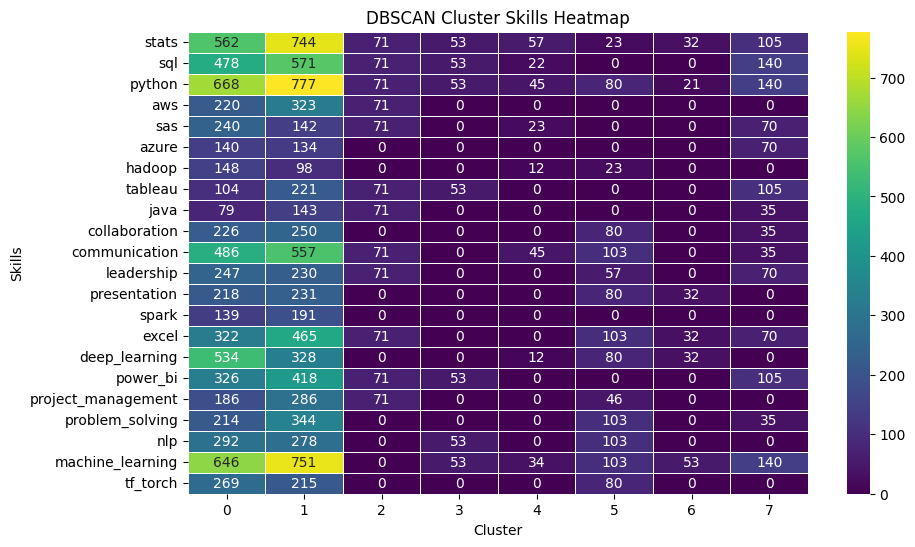

In [ ]:
# Convert DataFrame columns to numeric
cluster_skills_df_DBSCAN = cluster_skills_df_DBSCAN
cluster_skills_df_DBSCAN = cluster_skills_df_DBSCAN.apply(pd.to_numeric, errors='coerce')

# Ensure the data type is numeric
cluster_skills_df_DBSCAN = cluster_skills_df_DBSCAN.astype(float)

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_skills_df_DBSCAN, annot=True, fmt='.0f', cmap='viridis', linewidths=.5)

# Set plot labels and title
plt.xlabel('Cluster')
plt.ylabel('Skills')
plt.title('DBSCAN Cluster Skills Heatmap')

# Show the plot
plt.show()

KMeans Courses

In [ ]:
# Extracting the skills columns and the cluster label column
skills_columns = course_select.columns[:-4]
cluster_column = course_select.columns[-1] # switch to KMeans label

# Dictionary to store the frequency of each skill for each cluster
cluster_skill_frequency_KMeans = {}

# Iterate over clusters
for cluster_label in range(8):
    # Select rows for the current cluster
    cluster_data = course_select[course_select[cluster_column] == cluster_label]

    # Calculate skill frequencies for the current cluster
    skill_frequencies = cluster_data[skills_columns].sum().to_dict()

    # Store the skill frequencies in the dictionary
    cluster_skill_frequency_KMeans[cluster_label] = skill_frequencies

In [ ]:
# Create an empty DataFrame with skills as index and clusters as columns
cluster_skills_df_KMeans = pd.DataFrame(index=skills_columns, columns=range(8))

# Fill in the DataFrame with frequencies
for cluster, frequencies in cluster_skill_frequency_KMeans.items():
    for skill_name in skills_columns:
        frequency = frequencies.get(skill_name, None)
        cluster_skills_df_KMeans.at[skill_name, cluster] = frequency

In [ ]:
cluster_skills_df_KMeans

,0,1,2,3,4,5,6,7
stats,815,134,140,108,23,137,126,164
sql,642,111,134,114,0,140,89,105
python,848,144,233,119,80,161,130,140
aws,394,43,67,27,0,0,35,48
sas,213,79,17,70,0,70,38,59
azure,134,54,62,0,0,70,12,12
hadoop,98,79,34,35,23,0,0,12
tableau,292,0,77,68,0,105,0,12
java,214,0,54,0,0,35,13,12
collaboration,250,33,40,97,80,35,21,35


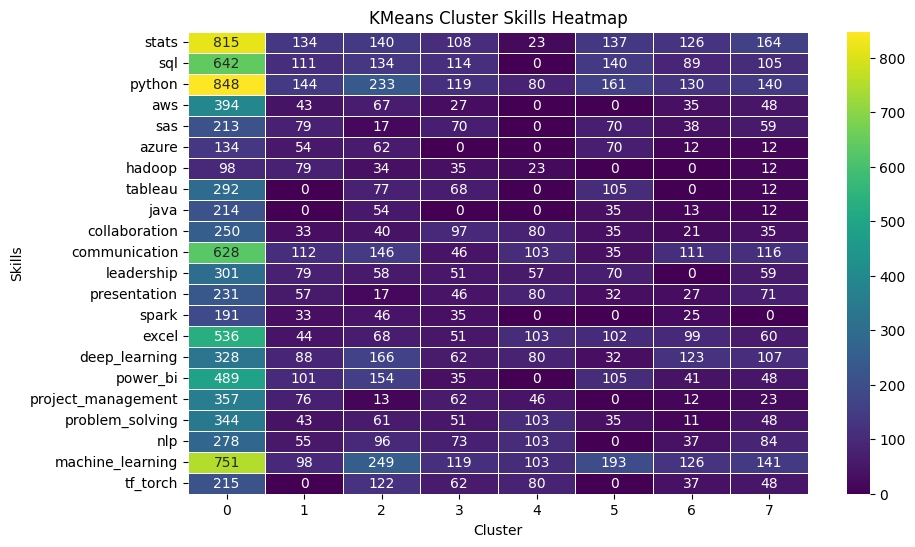

In [ ]:
# Convert DataFrame columns to numeric
cluster_skills_df_KMeans = cluster_skills_df_KMeans
cluster_skills_df_KMeans = cluster_skills_df_KMeans.apply(pd.to_numeric, errors='coerce')

# Ensure the data type is numeric
cluster_skills_df_KMeans = cluster_skills_df_KMeans.astype(float)

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_skills_df_KMeans, annot=True, fmt='.0f', cmap='viridis', linewidths=.5)

# Set plot labels and title
plt.xlabel('Cluster')
plt.ylabel('Skills')
plt.title('KMeans Cluster Skills Heatmap')

# Show the plot
plt.show()

#5. Interpretation of results and visualizations

The dendrogram plot from hierarchical clustering algorithm is provided in part 3. The scatterplots from k-means clustering algorithm and DBSCAN clustering
algorithm are provided in part 4. The visualization of elbow method used to find optimal k number of clusters for k-means clustering and eps value (DBSCAN clustering) are provided in part 4.

#6. Discussion and final course curriculum

How I develop the course curriculum: Firstly, find the hyperparameters that can make the DBSCAN and KMeans model generate 8 clusters. Then, generate a skills frequency dataframe that stores the frequency of each skill shown in each cluster of data points. Skills with top ranking frequency would be grouped together within each cluster. Then, make sure each skill is selected once and each group should have at least 3 different skills, and each skill should be selected once. A heatmap of the skills frequency dataframe was utilized to assist such process.

Please note that there are only 22 skills defined in my feature, in order to satisfy the requirement of at least 3 skills per course (I'm assuming 1 skill can only be assigned to 1 group), there will be 7 courses instead of 8 courses.

Results from DBSCAN:
* Course 1: stats, python, machine_learning
* Course 2: sql, aws, sas
* Course 3: communication, excel, power_bi
* Course 4: collaboration, deep_learning, nlp
* Course 5: tableau, leadership, problem_solving
* Course 6: java, presentation, project_management
* Course 7: azure, hadoop, spark, tf_torch

Results from KMeans:
* Course 1: stats, python, machine_learning
* Course 2: sql, aws, sas
* Course 3: collaboration, communication, deep_learning
* Course 4: tableau, leadership, project_management
* Course 5: presentation, power_bi, problem_solving
* Course 6: java, nlp, excel
* Course 7: azure, hadoop, spark, tf_torch

#7. OpenAI to describe clustering results

In [ ]:
try:
    import openai
except:
    !pip install openai
    import openai

In [ ]:
prompt1 = "After applying DBSCAN clustering, I have the following clusters (Course 1 to Course 7) of skills: Course 1: stats, python, machine_learning; Course 2: sql, aws, sas; Course 3: communication, excel, power_bi; Course 4: collaboration, deep_learning, nlp; Course 5: tableau, leadership, problem_solving; Course 6: java, presentation, project_management; Course 7: azure, hadoop, spark, tf_torch. After applying KMeans clustering, I have the following clusters (Course 1 to Course 7) of skills: Course 1: stats, python, machine_learning; Course 2: sql, aws, sas; Course 3: collaboration, communication, deep_learning; Course 4: tableau, leadership, project_management; Course 5: presentation, power_bi, problem_solving; Course 6: java, nlp, excel; Course 7: azure, hadoop, spark, tf_torch. For each case (DBSCAN and KMeans), describe what is common within each cluster of skills."

In [ ]:
prompt1[:min(len(prompt1),40000)]

'After applying DBSCAN clustering, I have the following clusters (Course 1 to Course 7) of skills: Course 1: stats, python, machine_learning; Course 2: sql, aws, sas; Course 3: communication, excel, power_bi; Course 4: collaboration, deep_learning, nlp; Course 5: tableau, leadership, problem_solving; Course 6: java, presentation, project_management; Course 7: azure, hadoop, spark, tf_torch. After applying KMeans clustering, I have the following clusters (Course 1 to Course 7) of skills: Course 1: stats, python, machine_learning; Course 2: sql, aws, sas; Course 3: collaboration, communication, deep_learning; Course 4: tableau, leadership, project_management; Course 5: presentation, power_bi, problem_solving; Course 6: java, nlp, excel; Course 7: azure, hadoop, spark, tf_torch. For each case (DBSCAN and KMeans), describe what is common within each cluster of skills.'

In [ ]:
from openai import OpenAI

client = OpenAI(
    # defaults to os.environ.get("OPENAI_API_KEY")
    api_key="your_api_key",
)

response1 = client.chat.completions.create(
    messages=[
        {"role": "system", "content": "You are a teaching stream professor."},
         {"role": "user", "content": prompt1[:min(len(prompt1),40000)]},
    ],
    model="gpt-3.5-turbo",
)

In [ ]:
print(response1.choices[0].message.content)

In both the DBSCAN and KMeans clustering results, we have obtained seven clusters of skills. Let's analyze each cluster and discuss what is common within them:

DBSCAN Clustering Results:
1. Course 1 cluster: skills include stats, python, and machine_learning. This cluster primarily focuses on statistical analysis, programming with Python, and machine learning techniques.
2. Course 2 cluster: skills include SQL, AWS, and SAS. This cluster revolves around working with databases, cloud computing using AWS, and statistical analysis using SAS.
3. Course 3 cluster: skills include communication, excel, and power_bi. This cluster emphasizes communication skills, working with spreadsheets using Excel, and creating data visualizations using Power BI.
4. Course 4 cluster: skills include collaboration, deep_learning, and NLP (natural language processing). This cluster is centered around collaboration techniques, deep learning algorithms, and NLP techniques like text analysis.
5. Course 5 cluster: